# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [84]:


from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [10]:
# Sua análise começa aqui.
print(athletes.shape)
athletes.head()

(11538, 11)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [11]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [89]:
 exploracao = pd.DataFrame({'nomes' : athletes.columns, 'tipos' : athletes.dtypes, 'NA #': athletes.isna().sum(), 'NA %' : (athletes.isna().sum() / athletes.shape[0]) * 100})

In [90]:
exploracao

,nomes,tipos,NA #,NA %
id,id,int64,0,0.000000
name,name,object,0,0.000000
nationality,nationality,object,0,0.000000
sex,sex,object,0,0.000000
dob,dob,object,1,0.008667
height,height,float64,330,2.860114
weight,weight,float64,659,5.711562
sport,sport,object,0,0.000000
gold,gold,int64,0,0.000000
silver,silver,int64,0,0.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [50]:
df1 = get_sample(athletes,"height",3000)

In [51]:
result = sct.shapiro(df1)
result

(0.9961519837379456, 5.681722541339695e-07)

In [85]:
def q1():
    df1 = get_sample(athletes,"height",3000)
    result = sct.shapiro(df1)
    return bool(result[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

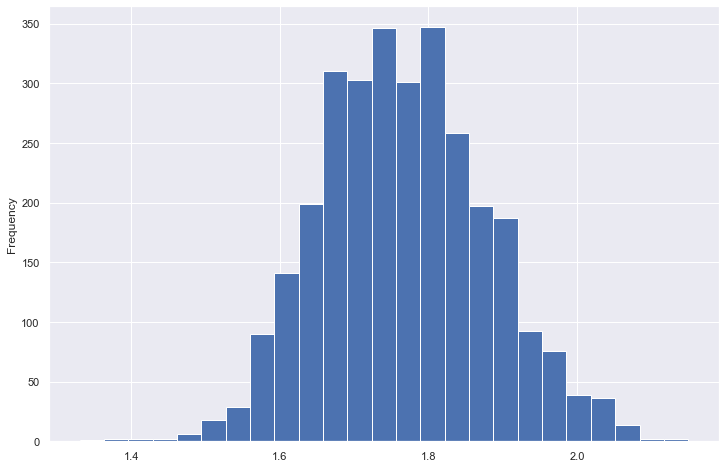

In [53]:
df1.plot(kind="hist", bins=25)

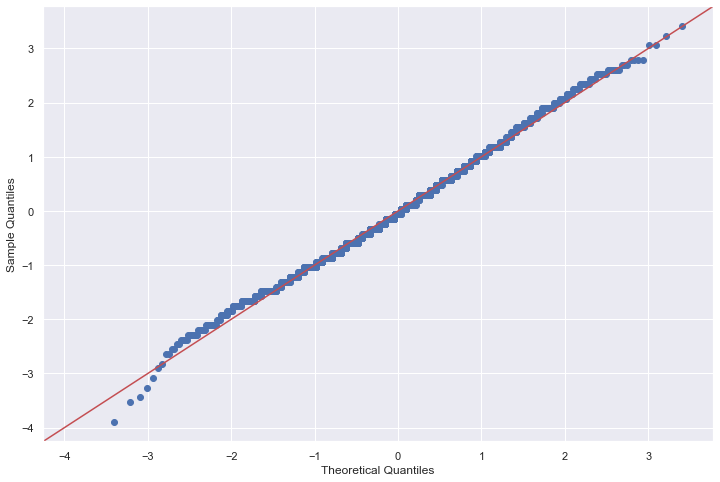

In [54]:
sm.qqplot(df1, fit=True, line='45');

In [44]:
#Apesar da forma do grafico lembrar uma forma normal, a partir dos resultados da questao 1 temos que o valor de p-value
# da funcao de shapiro e muito inferior ao alpha. Logo rejeitamos a h0.
#Como esse valor e bastante pequeno, os niveis de significancia mais usuais ainda seriam o mesmo resultado

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [56]:
df2 = get_sample(athletes,"height",3000)
result = sct.jarque_bera(df2)
result[1] > 0.05

False

In [86]:
def q2():
    df2 = get_sample(athletes,"height",3000)
    result = sct.jarque_bera(df2)
    return bool(result[1] > 0.05)
    # Retorne aqui o resultado da questão 2.

In [64]:
print("Skew:" + str(df2.skew()))
print("Kurtosis:"+ str(df2.kurtosis()))

Skew:0.15982888594665348
Kurtosis:-0.04487456446662286


__Para refletir__:

* Esse resultado faz sentido?

In [65]:
#Sim, pois o metodo de jarque_bera se baseia em skew e kurtosis, ou seja na assimetria e curtose do dado. 
#Logo esses valores deveriam ser proximos de 0 para que h0 nao fosse rejeitada

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [77]:
df3 = get_sample(athletes,"weight",3000)
result = sct.normaltest(df3)
result[1] > 0.05 

False

In [87]:
def q3():
    df3 = get_sample(athletes,"weight",3000)
    result = sct.normaltest(df3)
    return bool(result[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

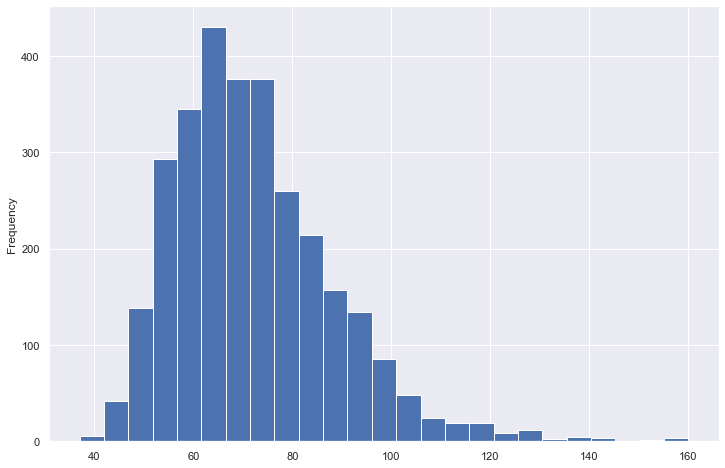

In [79]:
df3.plot(kind="hist", bins=25)

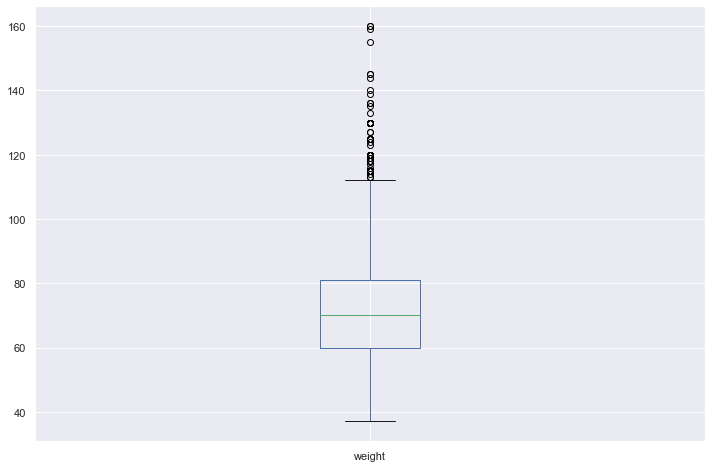

In [80]:
df3.plot(kind="box")

In [72]:
#O resultado faz bastante sentido. Como o teste deu falso, ou seja...rejeitaremos a h0. O formato do histograma nao segue uma distribuicao normal

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [75]:
df4 = np.log(df3)
result = sct.normaltest(df4)
result[1] > 0.05 

False

In [88]:
def q4():
    df4 = np.log(df3)
    result = sct.normaltest(df4)
    return bool(result[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [83]:
#Apesar do grafico ter uma forma normal por conta do da funcao log aplicada, ela n muda o fato que o teste deve ser robusto o suficiente para entender essas mudancas

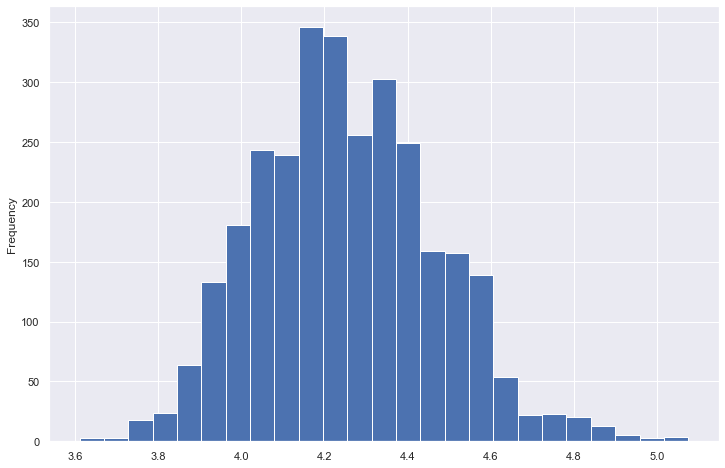

In [82]:
df4.plot(kind="hist", bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [91]:
#Como as colunas de heigth possuem valores null, irei dropar
bra = athletes[athletes['nationality']=='BRA']['height'].dropna()
usa = athletes[athletes['nationality']=='USA']['height'].dropna()
can = athletes[athletes['nationality']=='CAN']['height'].dropna()

In [93]:
result = sct.ttest_ind(bra, usa)
result[1]

0.001322927779592141

In [94]:
def q5():
    result = sct.ttest_ind(bra, usa)
    return bool(result[1] > 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [95]:
def q6():
    result = sct.ttest_ind(bra, can)
    # Retorne aqui o resultado da questão 6.
    return bool(result[1] > 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [107]:
result = sct.ttest_ind(usa, can,equal_var=False)
round(result[1],8)

0.00046601

In [108]:
def q7():
    result = sct.ttest_ind(usa, can,equal_var=False)
    return float(round(result[1],8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?